# Ending the HIV Epidemic (EHE) Priority Jurisdictions

#### Identifying zipcodes that fall within EHE Priority Jurisdictions as designated by the US Department of Health and Human Services (DHHS).

### https://www.hiv.gov/federal-response/ending-the-hiv-epidemic/jurisdictions/phase-one/

In [28]:
#set paths & load required Python packages

path2code = '/Users/brittdevries/Desktop/iCARUS/Studies/START/Scripts/'
path2data = '/Users/brittdevries/Desktop/iCARUS/'

import datetime, mmap, os, re, sys, decimal, glob
from datetime import datetime
from dateutil import parser
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import rpy2
from collections import defaultdict
from scipy.stats import pearsonr 
from skimpy import skim
import uszipcode
import pgeocode
pd.options.display.float_format = '{:.2f}'.format 
np.set_printoptions(suppress=True)
import session_info


In [3]:
#read in CSV of all pgeocode data

df_zips = pd.read_csv(path2data + 'pgeocode_all.csv')
df_zips.head()

,country_code,postal_code,place_name,state_name,state_code,county_name,county_code,latitude,longitude,accuracy
0,US,99553,Akutan,Alaska,AK,Aleutians East,13.0,54.1430,-165.7854,1.0
1,US,99571,Cold Bay,Alaska,AK,Aleutians East,13.0,55.1858,-162.7211,1.0
2,US,99583,False Pass,Alaska,AK,Aleutians East,13.0,54.8542,-163.4113,1.0
3,US,99612,King Cove,Alaska,AK,Aleutians East,13.0,55.0628,-162.3056,1.0
4,US,99661,Sand Point,Alaska,AK,Aleutians East,13.0,55.3192,-160.4914,1.0


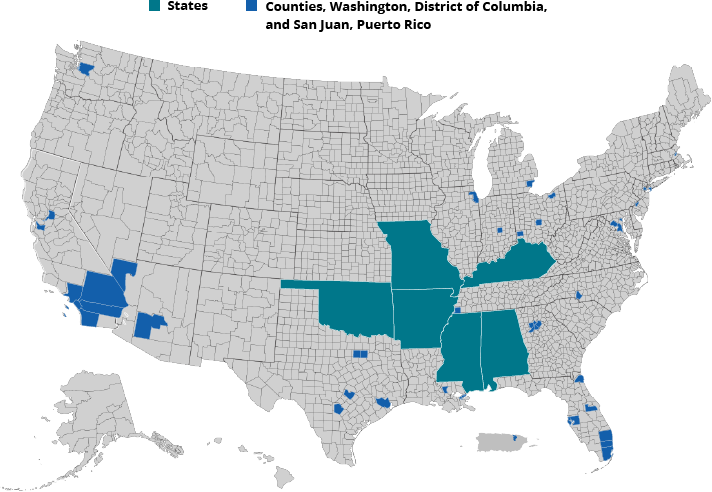

## Isolate EHE Jurisdictions by State & County Name

In [5]:
##ENTIRE STATES
#Alabama
#Arkansas
#Kentucky
#Mississippi
#Missouri
#Oklahoma
#South Carolina

df_states = df_zips.loc[ (df_zips['state_name'] == "Alabama") | (df_zips['state_name'] == "Arkansas") | (df_zips['state_name'] == "Kentucky")| (df_zips['state_name'] == "Mississippi")| (df_zips['state_name'] == "Missouri")| (df_zips['state_name'] == "Oklahoma")| (df_zips['state_name'] == "South Carolina") ]
df_states

,country_code,postal_code,place_name,state_name,state_code,county_name,county_code,latitude,longitude,accuracy
273,US,36003,Autaugaville,Alabama,AL,Autauga,1.0,32.4625,-86.7149,4.0
274,US,36006,Billingsley,Alabama,AL,Autauga,1.0,32.6596,-86.7178,4.0
275,US,36008,Booth,Alabama,AL,Autauga,1.0,32.5016,-86.5727,4.0
276,US,36051,Marbury,Alabama,AL,Autauga,1.0,32.6841,-86.4946,4.0
277,US,36066,Prattville,Alabama,AL,Autauga,1.0,32.4787,-86.4300,4.0
...,...,...,...,...,...,...,...,...,...,...
32671,US,29733,Rock Hill,South Carolina,SC,York,91.0,34.9926,-81.1787,4.0
32672,US,29734,Rock Hill,South Carolina,SC,York,91.0,34.9926,-81.1787,4.0
32673,US,29742,Sharon,South Carolina,SC,York,91.0,34.9084,-81.3729,4.0
32674,US,29743,Smyrna,South Carolina,SC,York,91.0,35.0308,-81.3896,4.0


In [6]:
##COUNTIES IN CALIFORNIA
#Alameda County
#Los Angeles County
#Orange County
#Riverside County
#Sacramento County
#San Bernadino County
#San Diego County
#San Francisco County

df_ca = df_zips.loc[ (df_zips['state_name'] == 'California') & ((df_zips['county_name'] == "Alameda") | (df_zips['county_name'] == "Los Angeles") | (df_zips['county_name'] == "Orange") | (df_zips['county_name'] == "Riverside") | (df_zips['county_name'] == "Sacramento") | (df_zips['county_name'] == "San Bernadino") | (df_zips['county_name'] == "San Diego") | (df_zips['county_name'] == "San Francisco"))]
df_ca

,country_code,postal_code,place_name,state_name,state_code,county_name,county_code,latitude,longitude,accuracy
2318,US,94501,Alameda,California,CA,Alameda,1.0,37.7706,-122.2648,4.0
2319,US,94502,Alameda,California,CA,Alameda,1.0,37.7351,-122.2431,4.0
2320,US,94536,Fremont,California,CA,Alameda,1.0,37.5605,-121.9999,4.0
2321,US,94537,Fremont,California,CA,Alameda,1.0,37.6802,-121.9215,4.0
2322,US,94538,Fremont,California,CA,Alameda,1.0,37.5308,-121.9712,4.0
...,...,...,...,...,...,...,...,...,...,...
4240,US,92195,San Diego,California,CA,San Diego,73.0,32.7153,-117.1573,4.0
4241,US,92196,San Diego,California,CA,San Diego,73.0,32.7153,-117.1573,4.0
4242,US,92197,San Diego,California,CA,San Diego,73.0,32.7153,-117.1573,4.0
4243,US,92198,San Diego,California,CA,San Diego,73.0,32.7153,-117.1573,4.0


In [7]:
##COUNTIES IN FLORIDA
#Broward County
#Duval County
#Hillsborough County
#Miami-Dade County
#Orange County
#Palm Beach County
#Pinellas County

df_fl = df_zips.loc[ (df_zips['state_name'] == 'Florida') & ((df_zips['county_name'] == "Broward") |(df_zips['county_name'] == "Duval") |(df_zips['county_name'] == "Hillsborough") |(df_zips['county_name'] == "Miami-Dade") |(df_zips['county_name'] == "Orange") |(df_zips['county_name'] == "Palm Beach") |(df_zips['county_name'] == "Pinella"))]
df_fl

,country_code,postal_code,place_name,state_name,state_code,county_name,county_code,latitude,longitude,accuracy
6460,US,33004,Dania,Florida,FL,Broward,11.0,26.0476,-80.1447,4.0
6461,US,33008,Hallandale,Florida,FL,Broward,11.0,25.9812,-80.1484,4.0
6462,US,33009,Hallandale,Florida,FL,Broward,11.0,25.9850,-80.1407,4.0
6463,US,33019,Hollywood,Florida,FL,Broward,11.0,26.0070,-80.1219,4.0
6464,US,33020,Hollywood,Florida,FL,Broward,11.0,26.0161,-80.1517,4.0
...,...,...,...,...,...,...,...,...,...,...
7448,US,33493,South Bay,Florida,FL,Palm Beach,99.0,26.6701,-80.7312,4.0
7449,US,33496,Boca Raton,Florida,FL,Palm Beach,99.0,26.4030,-80.1813,4.0
7450,US,33497,Boca Raton,Florida,FL,Palm Beach,99.0,26.3587,-80.0831,4.0
7451,US,33498,Boca Raton,Florida,FL,Palm Beach,99.0,26.3907,-80.2161,4.0


In [8]:
#Counties in Georgia
#Cobb County
#DeKalb County
#Fulton County
#Gwinnett County

df_ga = df_zips.loc[ (df_zips['state_name'] == 'Georgia') & ((df_zips['county_name'] == "Cobb") |(df_zips['county_name'] == "DeKalb") |(df_zips['county_name'] == "Fulton") |(df_zips['county_name'] == "Gwinnett"))]
df_ga

,country_code,postal_code,place_name,state_name,state_code,county_name,county_code,latitude,longitude,accuracy
8019,US,30006,Marietta,Georgia,GA,Cobb,67.0,33.9526,-84.5499,4.0
8020,US,30007,Marietta,Georgia,GA,Cobb,67.0,33.9125,-84.5572,4.0
8021,US,30008,Marietta,Georgia,GA,Cobb,67.0,33.8972,-84.5920,4.0
8022,US,30060,Marietta,Georgia,GA,Cobb,67.0,33.9382,-84.5403,4.0
8023,US,30061,Marietta,Georgia,GA,Cobb,67.0,33.9328,-84.5560,4.0
...,...,...,...,...,...,...,...,...,...,...
8357,US,30098,Duluth,Georgia,GA,Gwinnett,135.0,33.9604,-84.0379,4.0
8358,US,30099,Duluth,Georgia,GA,Gwinnett,135.0,33.9595,-84.1050,4.0
8359,US,30515,Buford,Georgia,GA,Gwinnett,135.0,33.9604,-84.0379,4.0
8360,US,30518,Buford,Georgia,GA,Gwinnett,135.0,34.1124,-83.9965,4.0


In [9]:
#Counties in Texas
#Bexar County
#Dallas County
#Harris County
#Tarrant County
#Travis County

df_tx = df_zips.loc[ (df_zips['state_name'] == 'Texas') & ((df_zips['county_name'] == "Bexar") |(df_zips['county_name'] == "Dallas") |(df_zips['county_name'] == "Harris") |(df_zips['county_name'] == "Tarrant") |(df_zips['county_name'] == "Travis"))]
df_tx

,country_code,postal_code,place_name,state_name,state_code,county_name,county_code,latitude,longitude,accuracy
33946,US,78002,Atascosa,Texas,TX,Bexar,29.0,29.2705,-98.7421,4.0
33947,US,78015,Boerne,Texas,TX,Bexar,29.0,29.7327,-98.6646,4.0
33948,US,78023,Helotes,Texas,TX,Bexar,29.0,29.6321,-98.7542,4.0
33949,US,78054,Macdona,Texas,TX,Bexar,29.0,29.3258,-98.6911,4.0
33950,US,78069,Somerset,Texas,TX,Bexar,29.0,29.2205,-98.6678,4.0
...,...,...,...,...,...,...,...,...,...,...
36243,US,78774,Austin,Texas,TX,Travis,453.0,30.3264,-97.7713,4.0
36244,US,78778,Austin,Texas,TX,Travis,453.0,30.3264,-97.7713,4.0
36245,US,78779,Austin,Texas,TX,Travis,453.0,30.3264,-97.7713,4.0
36246,US,78783,Austin,Texas,TX,Travis,453.0,30.3264,-97.7713,4.0


In [10]:
#Counties in Louisiana
#East Baton Rouge Parish
#Orleans Parish

df_la = df_zips.loc[ (df_zips['state_name'] == 'Louisiana') & ((df_zips['county_name'] == "East Baton Rouge Parish") |(df_zips['county_name'] == "Orleans Parish"))]
df_la

,country_code,postal_code,place_name,state_name,state_code,county_name,county_code,latitude,longitude,accuracy
14709,US,70704,Baker,Louisiana,LA,East Baton Rouge Parish,33.0,30.5159,-91.0804,4.0
14710,US,70714,Baker,Louisiana,LA,East Baton Rouge Parish,33.0,30.5814,-91.1429,4.0
14711,US,70739,Greenwell Springs,Louisiana,LA,East Baton Rouge Parish,33.0,30.5984,-90.9705,4.0
14712,US,70770,Pride,Louisiana,LA,East Baton Rouge Parish,33.0,30.6133,-90.9943,4.0
14713,US,70791,Zachary,Louisiana,LA,East Baton Rouge Parish,33.0,30.6561,-91.1358,4.0
14714,US,70801,Baton Rouge,Louisiana,LA,East Baton Rouge Parish,33.0,30.4492,-91.1856,4.0
14715,US,70802,Baton Rouge,Louisiana,LA,East Baton Rouge Parish,33.0,30.4438,-91.1775,4.0
14716,US,70803,Baton Rouge,Louisiana,LA,East Baton Rouge Parish,33.0,30.4050,-91.1868,4.0
14717,US,70804,Baton Rouge,Louisiana,LA,East Baton Rouge Parish,33.0,30.3863,-91.1339,4.0
14718,US,70805,Baton Rouge,Louisiana,LA,East Baton Rouge Parish,33.0,30.4860,-91.1481,4.0


In [11]:
#Counties in Maryland
##Baltimore City
##Montgomery County
##Prince George’s County

df_md = df_zips.loc[ (df_zips['state_name'] == 'Maryland') & ((df_zips['county_name'] == "Prince George") |(df_zips['county_name'] == "Montgomery") |(df_zips['county_name'] == "Baltimore City"))]
df_md

,country_code,postal_code,place_name,state_name,state_code,county_name,county_code,latitude,longitude,accuracy
16239,US,20810,Bethesda,Maryland,MD,Montgomery,31.0,38.9806,-77.1008,4.0
16240,US,20811,Bethesda,Maryland,MD,Montgomery,31.0,38.9806,-77.1008,4.0
16241,US,20812,Glen Echo,Maryland,MD,Montgomery,31.0,38.9693,-77.1435,4.0
16242,US,20813,Bethesda,Maryland,MD,Montgomery,31.0,39.1440,-77.2076,4.0
16243,US,20814,Bethesda,Maryland,MD,Montgomery,31.0,39.0003,-77.1022,4.0
...,...,...,...,...,...,...,...,...,...,...
16310,US,20915,Silver Spring,Maryland,MD,Montgomery,31.0,38.9907,-77.0261,4.0
16311,US,20916,Silver Spring,Maryland,MD,Montgomery,31.0,38.9907,-77.0261,4.0
16312,US,20918,Silver Spring,Maryland,MD,Montgomery,31.0,38.9907,-77.0261,4.0
16313,US,20993,Silver Spring,Maryland,MD,Montgomery,31.0,39.0336,-76.9861,4.0


In [12]:
#Counties in New Jersey
##Essex County
##Hudson County

df_nj = df_zips.loc[ (df_zips['state_name'] == 'New Jersey') & ((df_zips['county_name'] == "Essex") |(df_zips['county_name'] == "Hudson") )]
df_nj

,country_code,postal_code,place_name,state_name,state_code,county_name,county_code,latitude,longitude,accuracy
23874,US,7003,Bloomfield,New Jersey,NJ,Essex,13.0,40.8035,-74.1891,4.0
23875,US,7004,Fairfield,New Jersey,NJ,Essex,13.0,40.8822,-74.2960,4.0
23876,US,7006,Caldwell,New Jersey,NJ,Essex,13.0,40.8545,-74.2789,4.0
23877,US,7007,Caldwell,New Jersey,NJ,Essex,13.0,40.8398,-74.2765,4.0
23878,US,7009,Cedar Grove,New Jersey,NJ,Essex,13.0,40.8534,-74.2297,4.0
...,...,...,...,...,...,...,...,...,...,...
23965,US,7308,Jersey City,New Jersey,NJ,Hudson,17.0,40.7328,-74.0755,4.0
23966,US,7310,Jersey City,New Jersey,NJ,Hudson,17.0,40.7324,-74.0431,4.0
23967,US,7311,Jersey City,New Jersey,NJ,Hudson,17.0,40.7323,-74.0754,4.0
23968,US,7395,Jersey City,New Jersey,NJ,Hudson,17.0,40.7279,-74.0780,4.0


In [13]:
#Counties in New York
##Bronx County
##Kings County
##New York County
##Queens County

df_ny = df_zips.loc[ (df_zips['state_name'] == 'New York') & ((df_zips['county_name'] == "Bronx") |(df_zips['county_name'] == "Kings") |(df_zips['county_name'] == "New York") |(df_zips['county_name'] == "Queens") )]
df_ny

,country_code,postal_code,place_name,state_name,state_code,county_name,county_code,latitude,longitude,accuracy
25168,US,10451,Bronx,New York,NY,Bronx,5.0,40.8222,-73.9217,4.0
25169,US,10452,Bronx,New York,NY,Bronx,5.0,40.8376,-73.9216,4.0
25170,US,10453,Bronx,New York,NY,Bronx,5.0,40.8520,-73.9129,4.0
25171,US,10454,Bronx,New York,NY,Bronx,5.0,40.8085,-73.9198,4.0
25172,US,10455,Bronx,New York,NY,Bronx,5.0,40.8153,-73.9072,4.0
...,...,...,...,...,...,...,...,...,...,...
26555,US,11692,Arverne,New York,NY,Queens,81.0,40.5923,-73.7933,4.0
26556,US,11693,Far Rockaway,New York,NY,Queens,81.0,40.6076,-73.8198,4.0
26557,US,11694,Rockaway Park,New York,NY,Queens,81.0,40.5766,-73.8428,4.0
26558,US,11695,Far Rockaway,New York,NY,Queens,81.0,40.6514,-73.8708,4.0


In [14]:
#Counties in Ohio
##Cuyahoga County
##Franklin County
##Hamilton County

df_oh = df_zips.loc[ (df_zips['state_name'] == 'Ohio') & ((df_zips['county_name'] == "Cuyahoga") |(df_zips['county_name'] == "Franklin") |(df_zips['county_name'] == "Hamilton") )]
df_oh

,country_code,postal_code,place_name,state_name,state_code,county_name,county_code,latitude,longitude,accuracy
27452,US,44017,Berea,Ohio,OH,Cuyahoga,35.0,41.3676,-81.8618,4.0
27453,US,44022,Chagrin Falls,Ohio,OH,Cuyahoga,35.0,41.4494,-81.4314,4.0
27454,US,44040,Gates Mills,Ohio,OH,Cuyahoga,35.0,41.5324,-81.4150,4.0
27455,US,44070,North Olmsted,Ohio,OH,Cuyahoga,35.0,41.4201,-81.9131,4.0
27456,US,44101,Cleveland,Ohio,OH,Cuyahoga,35.0,41.5234,-81.5996,4.0
...,...,...,...,...,...,...,...,...,...,...
27767,US,45280,Cincinnati,Ohio,OH,Hamilton,61.0,39.1620,-84.4569,4.0
27768,US,45296,Cincinnati,Ohio,OH,Hamilton,61.0,39.1668,-84.5382,4.0
27769,US,45298,Cincinnati,Ohio,OH,Hamilton,61.0,39.1668,-84.5382,4.0
27770,US,45299,Cincinnati,Ohio,OH,Hamilton,61.0,39.2622,-84.5093,4.0


In [15]:
##COUNTIES IN STATES WITH ONLY ONE COUNTY
##Illinois – Cook County
##Indiana – Marion County
##Pennsylvania – Philadelphia County
##Tennessee – Shelby County
##Arizona – Maricopa County
##Massachusetts – Suffolk County
##Michigan – Wayne County
##Nevada – Clark County
##North Carolina – Mecklenburg County
##Puerto Rico – San Juan Municipio

df_single_counties = df_zips.loc[ ((df_zips['county_name'] == "Cook") & (df_zips['state_name'] == "Illinois")) | ((df_zips['county_name'] == "Marion") & (df_zips['state_name'] == "Indiana")) \
    | ((df_zips['county_name'] == "Philadelphia") & (df_zips['state_name'] == "Pennsylvania")) | ((df_zips['county_name'] == "Shelby") & (df_zips['state_name'] == "Tennessee")) \
    | ((df_zips['county_name'] == "Maricopa") & (df_zips['state_name'] == "Arizona")) | ((df_zips['county_name'] == "Suffolk") & (df_zips['state_name'] == "Massachusetts")) \
    | ((df_zips['county_name'] == "Wayne") & (df_zips['state_name'] == "Michigan")) | ((df_zips['county_name'] == "Clark") & (df_zips['state_name'] == "Nevada")) \
    | ((df_zips['county_name'] == "Mecklenburg") & (df_zips['state_name'] == "North Carolina"))]
df_single_counties

,country_code,postal_code,place_name,state_name,state_code,county_name,county_code,latitude,longitude,accuracy
1909,US,85001,Phoenix,Arizona,AZ,Maricopa,13.0,33.4484,-112.0740,4.0
1910,US,85002,Phoenix,Arizona,AZ,Maricopa,13.0,33.4484,-112.0740,4.0
1911,US,85003,Phoenix,Arizona,AZ,Maricopa,13.0,33.4511,-112.0774,4.0
1912,US,85004,Phoenix,Arizona,AZ,Maricopa,13.0,33.4557,-112.0686,4.0
1913,US,85005,Phoenix,Arizona,AZ,Maricopa,13.0,33.4484,-112.0740,4.0
...,...,...,...,...,...,...,...,...,...,...
33733,US,38188,Memphis,Tennessee,TN,Shelby,157.0,35.2017,-89.9715,4.0
33734,US,38190,Memphis,Tennessee,TN,Shelby,157.0,35.2017,-89.9715,4.0
33735,US,38193,Memphis,Tennessee,TN,Shelby,157.0,35.2017,-89.9715,4.0
33736,US,38194,Memphis,Tennessee,TN,Shelby,157.0,35.2017,-89.9715,4.0


In [16]:
#Concatenating all dataframes together

df_ehe = pd.concat([df_oh, df_ny, df_ca, df_nj, df_md, df_la, df_tx, df_ga, df_single_counties, df_fl, df_states], ignore_index=True, axis=0)
df_ehe.head(1000)

,country_code,postal_code,place_name,state_name,state_code,county_name,county_code,latitude,longitude,accuracy
0,US,44017,Berea,Ohio,OH,Cuyahoga,35.0,41.3676,-81.8618,4.0
1,US,44022,Chagrin Falls,Ohio,OH,Cuyahoga,35.0,41.4494,-81.4314,4.0
2,US,44040,Gates Mills,Ohio,OH,Cuyahoga,35.0,41.5324,-81.4150,4.0
3,US,44070,North Olmsted,Ohio,OH,Cuyahoga,35.0,41.4201,-81.9131,4.0
4,US,44101,Cleveland,Ohio,OH,Cuyahoga,35.0,41.5234,-81.5996,4.0
...,...,...,...,...,...,...,...,...,...,...
995,US,91606,North Hollywood,California,CA,Los Angeles,37.0,34.1872,-118.3865,4.0
996,US,91607,Valley Village,California,CA,Los Angeles,37.0,34.1672,-118.3989,4.0
997,US,91608,Universal City,California,CA,Los Angeles,37.0,34.1383,-118.3528,4.0
998,US,91609,North Hollywood,California,CA,Los Angeles,37.0,34.1722,-118.3790,4.0


In [17]:
#marking individual regions as being in EHE priority jurisdiction

df_ehe['ehe_jurisdiction'] = 1

In [24]:
#export just ehe jurisdcition dataframe to csv

df_ehe.to_csv(path2data + 'ehe_jurisdictions_only.csv')

In [25]:
#merge back in rest of data

df_all = pd.concat([df_ehe, df_zips], ignore_index=True, axis=0)
df_all.head(100)

,country_code,postal_code,place_name,state_name,state_code,county_name,county_code,latitude,longitude,accuracy,ehe_jurisdiction
0,US,44017,Berea,Ohio,OH,Cuyahoga,35.0,41.3676,-81.8618,4.0,1.0
1,US,44022,Chagrin Falls,Ohio,OH,Cuyahoga,35.0,41.4494,-81.4314,4.0,1.0
2,US,44040,Gates Mills,Ohio,OH,Cuyahoga,35.0,41.5324,-81.4150,4.0,1.0
3,US,44070,North Olmsted,Ohio,OH,Cuyahoga,35.0,41.4201,-81.9131,4.0,1.0
4,US,44101,Cleveland,Ohio,OH,Cuyahoga,35.0,41.5234,-81.5996,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
95,US,43216,Columbus,Ohio,OH,Franklin,49.0,39.9690,-83.0114,4.0,1.0
96,US,43217,Columbus,Ohio,OH,Franklin,49.0,39.8277,-82.9342,4.0,1.0
97,US,43218,Columbus,Ohio,OH,Franklin,49.0,39.9690,-83.0114,4.0,1.0
98,US,43219,Columbus,Ohio,OH,Franklin,49.0,40.0326,-82.9103,4.0,1.0


In [26]:
#examine number of unique postal codes
len(df_all.postal_code.unique())

41481

In [21]:
#check for 100% duplicates and remove
df_all['duplicate'] = df_all.duplicated(keep='first')
df_clean = df_all.loc[df_all.duplicate != 1]
df_clean.head(1000)

,country_code,postal_code,place_name,state_name,state_code,county_name,county_code,latitude,longitude,accuracy,ehe_jurisdiction,duplicate_zip,duplicate
0,US,44017,Berea,Ohio,OH,Cuyahoga,35.0,41.3676,-81.8618,4.0,1.0,False,False
1,US,44022,Chagrin Falls,Ohio,OH,Cuyahoga,35.0,41.4494,-81.4314,4.0,1.0,False,False
2,US,44040,Gates Mills,Ohio,OH,Cuyahoga,35.0,41.5324,-81.4150,4.0,1.0,False,False
3,US,44070,North Olmsted,Ohio,OH,Cuyahoga,35.0,41.4201,-81.9131,4.0,1.0,False,False
4,US,44101,Cleveland,Ohio,OH,Cuyahoga,35.0,41.5234,-81.5996,4.0,1.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,US,91606,North Hollywood,California,CA,Los Angeles,37.0,34.1872,-118.3865,4.0,1.0,False,False
996,US,91607,Valley Village,California,CA,Los Angeles,37.0,34.1672,-118.3989,4.0,1.0,False,False
997,US,91608,Universal City,California,CA,Los Angeles,37.0,34.1383,-118.3528,4.0,1.0,False,False
998,US,91609,North Hollywood,California,CA,Los Angeles,37.0,34.1722,-118.3790,4.0,1.0,False,False


In [ ]:
#export to csv
df_clean.to_csv(path2data + 'zipcodes_add_ehe.csv')

In [29]:
#print session info
session_info.show()